<center> 

## **Applied ML as a Search Problem: Iterated Local Search From Scratch in Python**

</center>

### `Applied machine learning is the problem of approximating an unknown underlying mapping function from inputs to outputs`

Many factors influence this search, including:
Choice of data: What data you use, how it’s prepared, and how much you include
impacts the quality of your model.
Choice of algorithm: Different algorithms map inputs to outputs differently. Your choice here narrows the possible solutions.
and etc


**Implications of Machine Learning as Search**

**Iterative Learning**: Many machine learning algorithms learn in steps, improving as they go. It’s like climbing a hill, where each step brings the model closer to a good solution.

**Ensembles**: Combining multiple models can make predictions more accurate and reliable. Since different models make different mistakes, putting them together balances out those errors.

**Spot Checking**: Trying out different algorithms at the start helps quickly find what works best for the data, as no single algorithm is perfect for every problem.

## APPLICATION-1 STOCHASTIC HILL CLIMBIMG ALGORITHM

### Importing Libraries
- `asarray`: Converts an input into a NumPy array.
- `randn`: Generates an array of random numbers from a standard normal distribution (mean=0, standard deviation=1).
- `rand`: Generates an array of random numbers from a uniform distribution over [0, 1).
- `seed`: Sets the seed for random number generation, ensuring reproducibility.
- `pyplot`: A Matplotlib module that provides a MATLAB-like interface for plotting.
- `arange`: Generates a NumPy array with evenly spaced values over a specified interval.


In [1]:
from numpy import asarray
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
from numpy import arange

  ### Objective function:

It computes the square of the first element of the input array x. This function is commonly used in optimization problems because it has a global minimum at x = 0 (where the function value is 0), and the function increases as the value of x moves away from 0.

In [2]:
# Objective function
def objective(x):
    return x[0]**2.0



### Overview of Hill Climbing Algorithm:
1. **Initial Solution**:
   - The algorithm starts by generating a random solution within the provided bounds. The initial solution is sampled using the `rand` function, scaled by the difference between the upper and lower bounds for each dimension.

2. **Evaluation of Initial Solution**:
   - The initial solution is then evaluated using the `objective` function.

3. **Main Loop**:
   - For each iteration, the algorithm generates a **candidate solution** by adding a random perturbation (sampled from a normal distribution, scaled by `step_size`) to the current solution.
   - The new candidate solution is evaluated using the `objective` function.
   - If the new candidate solution has a better or equal evaluation (in the case of minimization, a lower value), it becomes the new current solution.
   - The current solution and its evaluation are then stored for tracking purposes.

4. **Progress Reporting**:
   - The algorithm prints the progress during each iteration, showing the solution and its corresponding evaluation score.

5. **Termination**:
   - The algorithm continues for `n_iterations` or until convergence, whichever comes first.
   - Finally, it returns the best solution found, its corresponding evaluation, and lists of all solutions and evaluations during the search.

### Example Execution:
If you were to run this on your earlier `objective` function (which is `x[0]**2`), the algorithm would try to find the value of `x[0]` that minimizes the square of `x[0]` (i.e., it would try to find `x = 0`).


In [3]:
# hill climbing local search algorithm
def hillclimbing(objective, bounds, n_iterations, step_size):
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# evaluate the initial point
	solution_eval = objective(solution)
	# run the hill climb
	solutions = list()
	solutions.append(solution)
	for i in range(n_iterations):
		# take a step
		candidate = solution + randn(len(bounds)) * step_size
		# evaluate candidate point
		candidte_eval = objective(candidate)
		# check if we should keep the new point
		if candidte_eval <= solution_eval:
			# store the new point
			solution, solution_eval = candidate, candidte_eval
			# keep track of solutions
			solutions.append(solution)
			# report progress
			print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solution, solution_eval, solutions]

The **Hill Climbing Local Search** algorithm on the objective function (`x[0]**2`) within the specified bounds of `[-5.0, 5.0]`, using a total of 1000 iterations and a step size of 0.1.


1. **Seeding the Random Generator**:
   - `seed(5)` ensures that the random number generation is reproducible, so running this code multiple times will produce the same results each time.
   
2. **Setting the Input Bounds**:
   - `bounds = asarray([[-5.0, 5.0]])` specifies that the algorithm will search for solutions within the range `[-5.0, 5.0]` for the single-dimensional `x`.

3. **Defining the Number of Iterations**:
   - `n_iterations = 1000` sets the number of iterations the algorithm will run. Each iteration involves taking a random step and evaluating a new candidate solution.

4. **Step Size**:
   - `step_size = 0.1` specifies the magnitude of random steps in each iteration. Larger step sizes allow the algorithm to explore the search space more broadly, while smaller ones make finer adjustments.

5. **Running the Hill Climbing Algorithm**:
   - The algorithm starts with a random solution within the bounds and iteratively tries to improve it by taking small random steps and evaluating each candidate solution.

6. **Output**:
   - After completing all iterations, it prints the final solution and its evaluation (i.e., `f(x)`), where `x` is the best solution found.




In [4]:
# seed the pseudorandom number generator
seed(5)
# define range for input
bounds = asarray([[-5.0, 5.0]])
# define the total iterations
n_iterations = 1000
# define the maximum step size
step_size = 0.1
# perform the hill climbing search
best, score, solutions = hillclimbing(objective, bounds, n_iterations, step_size)
print('Done!')
print('f(%s) = %f' % (best, score))

>1 f([-2.74290923]) = 7.52355
>3 f([-2.65873147]) = 7.06885
>4 f([-2.52197291]) = 6.36035
>5 f([-2.46450214]) = 6.07377
>7 f([-2.44740961]) = 5.98981
>9 f([-2.28364676]) = 5.21504
>12 f([-2.19245939]) = 4.80688
>14 f([-2.01001538]) = 4.04016
>15 f([-1.86425287]) = 3.47544
>22 f([-1.79913002]) = 3.23687
>24 f([-1.57525573]) = 2.48143
>25 f([-1.55047719]) = 2.40398
>26 f([-1.51783757]) = 2.30383
>27 f([-1.49118756]) = 2.22364
>28 f([-1.45344116]) = 2.11249
>30 f([-1.33055275]) = 1.77037
>32 f([-1.17805016]) = 1.38780
>33 f([-1.15189314]) = 1.32686
>36 f([-1.03852644]) = 1.07854
>37 f([-0.99135322]) = 0.98278
>38 f([-0.79448984]) = 0.63121
>39 f([-0.69837955]) = 0.48773
>42 f([-0.69317313]) = 0.48049
>46 f([-0.61801423]) = 0.38194
>48 f([-0.48799625]) = 0.23814
>50 f([-0.22149135]) = 0.04906
>54 f([-0.20017144]) = 0.04007
>57 f([-0.15994446]) = 0.02558
>60 f([-0.15492485]) = 0.02400
>61 f([-0.03572481]) = 0.00128
>64 f([-0.03051261]) = 0.00093
>66 f([-0.0074283]) = 0.00006
>78 f([-0.00202



### **Plot 1: Objective Function vs Solutions**
- This plot visualizes the objective function `f(x) = x[0]**2` across the input range defined by `bounds`.
- **Objective Function Curve**: It plots the objective function as a dashed line (`'--'`), showing how `f(x)` behaves for different values of `x`.
- **Optimal Solution**: A red vertical line at `x = 0` shows the location of the optimal solution (where `f(x)` reaches its minimum).
- **Steps Taken**: Black circles (`'o'`) mark the locations of the solutions generated by the hill climbing algorithm, showing how the algorithm progresses toward the optimal solution.







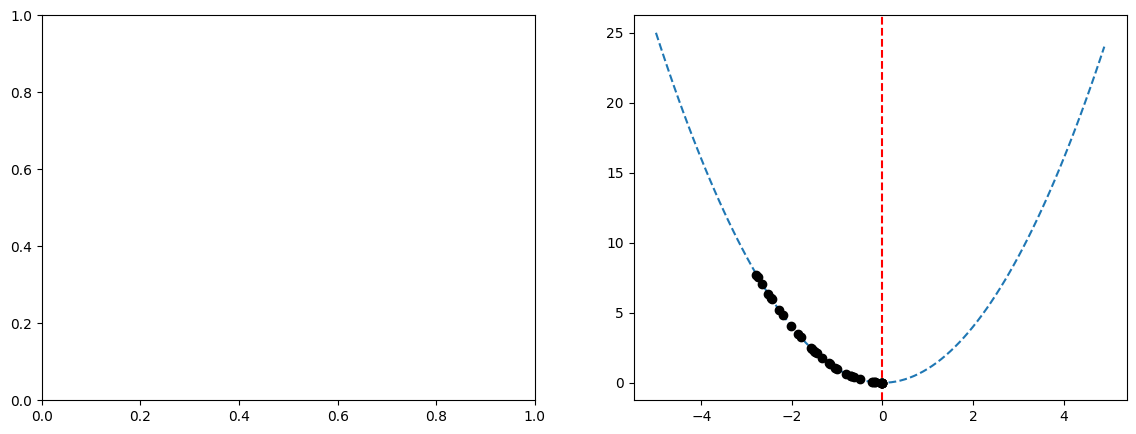

<Figure size 640x480 with 0 Axes>

In [5]:
# Prepare plots in subplots
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(14, 5))

# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1], 0.1)
# create a line plot of input vs result
pyplot.plot(inputs, [objective([x]) for x in inputs], '--')
# draw a vertical line at the optimal input
pyplot.axvline(x=[0.0], ls='--', color='red')
# plot the sample as black circles
pyplot.plot(solutions, [objective(x) for x in solutions], 'o', color='black')
pyplot.show()


# Show plots
pyplot.tight_layout()
pyplot.show()

### Importing Libraries:

1. **`numpy` (as `np`)**:
   - Provides efficient numerical operations, especially for working with arrays and matrices.
   
2. **`randn`**:
   - Generates random numbers from a standard normal distribution (mean = 0, standard deviation = 1).
   
3. **`rand`**:
   - Generates random numbers from a uniform distribution over `[0, 1)`.

4. **`matplotlib.pyplot` (as `plt`)**:
   - Used for creating visualizations, such as plotting graphs and figures.



In [6]:
import numpy as np
from numpy.random import randn, rand
import matplotlib.pyplot as plt

The objective function models the cost of resource allocation with penalties for falling short of the required demands.

### **Explanation**:
1. **Inputs**:
   - `allocation`: A list or array representing the amount of resources allocated to each task.
   - `demands`: A list or array representing the demand or required amount of resources for each task.

2. **Cost Calculation**:
   - For each task (loop over the length of `allocation`):
     - **Basic Cost**: The square of the allocated amount (`allocation[i]**2`). This simulates rising costs as more resources are allocated.
     - **Penalty**: If the allocated amount is less than the required demand (`allocation[i] < demands[i]`), a penalty is added. The penalty is proportional to how much the allocation falls short of the demand: `(demands[i] - allocation[i]) * penalty`.
   
3. **Accumulation**:
   - The cost for each task (`task_cost`) is added to the total `cost`.

4. **Return Value**:
   - The function returns the total `cost`, which includes both the basic costs and any penalties for falling short of the demand.

### **Example**:
Let’s say you have:
- `allocation = [5, 3, 8]`
- `demands = [6, 2, 7]`

The calculation will be:
- For the first task (`allocation[0] = 5`, `demand[0] = 6`):
  - Basic cost: `5^2 = 25`
  - Penalty: `10 * (6 - 5) = 10`
  - Total cost for task 1: `25 + 10 = 35`
  
- For the second task (`allocation[1] = 3`, `demand[1] = 2`):
  - Basic cost: `3^2 = 9`
  - No penalty (since allocation is greater than or equal to demand)
  - Total cost for task 2: `9`
  
- For the third task (`allocation[2] = 8`, `demand[2] = 7`):
  - Basic cost: `8^2 = 64`
  - No penalty (since allocation is greater than or equal to demand)
  - Total cost for task 3: `64`

Thus, the total `cost = 35 + 9 + 64 = 108`.

### **Use Case**:
This function is useful for solving resource allocation problems where you want to minimize the total cost of allocating resources to tasks while ensuring that you meet demands. You can modify the penalty or other parameters depending on the nature of the task.



In [7]:
def objective(allocation, demands):
    penalty = 10  # High cost if resources fall below demand
    cost = 0
    for i in range(len(allocation)):
        # Basic cost: the resource amount squared to simulate rising costs with usage
        task_cost = allocation[i]**2
        # Add a penalty if allocation is less than demand
        if allocation[i] < demands[i]:
            task_cost += penalty * (demands[i] - allocation[i])  # Penalty for falling short
        cost += task_cost
    return cost

The `hill_climbing_cloud` function implements a **stochastic hill climbing** algorithm to solve the resource allocation problem.

### **Explanation**:
1. **Inputs**:
   - `objective`: The objective function that calculates the cost (which is based on the allocation and demands).
   - `demands`: The required resources for each task.
   - `bounds`: The bounds for each resource allocation (lower and upper bounds for each task).
   - `n_iterations`: The number of iterations to run the hill climbing algorithm.
   - `step_size`: The magnitude of the random step taken at each iteration.

2. **Initial Setup**:
   - A random initial allocation is generated within the bounds: `allocation = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])`.
   - The initial cost (evaluation) of the allocation is calculated using the `objective` function.

3. **Main Loop**:
   - **Candidate Allocation**: In each iteration, a random step is taken from the current allocation to generate a new candidate solution. The step is drawn from a normal distribution (`randn(len(bounds)) * step_size`).
   - **Bounds Check**: The candidate solution is clipped to ensure it stays within the given bounds (`np.clip(candidate, bounds[:, 0], bounds[:, 1])`).
   - **Evaluation**: The new candidate allocation is evaluated using the `objective` function.
   - **Improvement Check**: If the candidate's evaluation is better (lower cost) than the current best, it is accepted as the new best solution, and the current allocation is updated.

4. **Tracking Evaluations**:
   - The evaluations of the current allocation at each step are stored in `evaluations` to track the progress of the optimization.

5. **Return Values**:
   - The function returns the **best allocation** found, its **evaluation (cost)**, and a list of all **evaluations** during the iterations.

### **Example Use Case**:

Assume you are running the stochastic hill climbing algorithm for resource allocation across 3 tasks. You might define:
- `bounds = np.array([[0, 10], [0, 5], [0, 8]])` (meaning that task 1 can be allocated between 0 and 10 units, task 2 between 0 and 5, and task 3 between 0 and 8).
- `demands = np.array([5, 3, 6])` (indicating the required resources for each task).
- `n_iterations = 100` (number of iterations for the optimization process).
- `step_size = 0.5` (magnitude of the random step).

The algorithm will try to find the optimal allocation of resources to minimize the cost, where the cost is defined by how much the allocation exceeds or falls short of the demands, as well as the rising cost of higher resource usage.

### **Print Output**:
During the iterations, the algorithm prints the step number, the current cost, and the current allocation:

Step 0, Cost: 100.5, Allocation: [4.5, 2.5, 5.8]

Step 1, Cost: 90.2, Allocation: [4.2, 3.0, 5.5]






In [8]:
# Stochastic hill climbing algorithm
def hill_climbing_cloud(objective, demands, bounds, n_iterations, step_size):
    # Initial random allocation
    allocation = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    allocation_eval = objective(allocation, demands)

    best_allocation, best_eval = allocation, allocation_eval
    evaluations = []

    for i in range(n_iterations):
        # Take a random step
        candidate = allocation + randn(len(bounds)) * step_size
        # Keep allocations within bounds
        candidate = np.clip(candidate, bounds[:, 0], bounds[:, 1])
        candidate_eval = objective(candidate, demands)

        # Check if the new allocation is better
        if candidate_eval < best_eval:
            best_allocation, best_eval = candidate, candidate_eval
            allocation, allocation_eval = candidate, candidate_eval
            print(f"Step {i}, Cost: {allocation_eval}, Allocation: {allocation}")

        evaluations.append(allocation_eval)

    return best_allocation, best_eval, evaluations


### **Execution**:
- The `hill_climbing_cloud` algorithm will start with a random allocation of resources within the given bounds and iteratively improve the allocation to minimize the cost (as calculated by the `objective` function).
- The algorithm will evaluate new candidates by taking small random steps in the solution space and updating the solution if a better allocation is found (i.e., a lower cost).
  



In [9]:
# Define the task demands and bounds for resources (e.g., CPUs, memory)
demands = np.array([2, 4, 1, 3])  # Minimum resource demand per task
bounds = np.array([[1, 10], [1, 10], [1, 10], [1, 10]])  # Resource bounds per task
n_iterations = 200
step_size = 0.5
# Run the hill climbing search

best_allocation, best_score, evaluations = hill_climbing_cloud(objective, demands, bounds, n_iterations, step_size)

print('Best Allocation:', best_allocation)
print('Best Cost:', best_score)


Step 3, Cost: 119.32060660140934, Allocation: [7.46378155 5.31390993 2.60962156 5.34460552]
Step 5, Cost: 112.49086475199766, Allocation: [7.31261165 4.95938298 2.69126599 5.21326994]
Step 7, Cost: 103.43397115684742, Allocation: [7.20819917 4.24074481 2.88795824 5.01513873]
Step 8, Cost: 84.40242237302434, Allocation: [5.69653469 4.37728236 2.44362565 5.1788037 ]
Step 14, Cost: 80.90137156949154, Allocation: [5.41777402 3.99232224 2.2643281  5.51420892]
Step 17, Cost: 75.95320013728772, Allocation: [4.79591349 4.39802723 2.38195367 5.28545809]
Step 18, Cost: 71.33501847916904, Allocation: [3.41639598 5.02066693 2.43443439 5.34131911]
Step 22, Cost: 66.7589529913171, Allocation: [3.40969602 4.99587635 2.63770159 4.81836859]
Step 23, Cost: 64.70013343157711, Allocation: [3.00541069 4.59288816 1.96766231 5.5408775 ]
Step 24, Cost: 62.754312098808995, Allocation: [2.69184028 5.46407866 1.02588021 4.95981071]
Step 26, Cost: 61.125543699362595, Allocation: [2.50100386 4.90060391 1.         

The plot will show the **total cost** reduction over the iterations of the stochastic hill climbing algorithm. The `evaluations` list contains the cost at each step, so plotting it will give you insight into how the algorithm progresses and how much the total cost decreases as it iterates through different resource allocations.

### Expected Outcome:
- The **x-axis** represents the iteration number.
- The **y-axis** represents the total cost associated with the allocation at each iteration.
- As the algorithm proceeds, the cost should decrease, reflecting improvements in the allocation.

The resulting plot will show the algorithm's progress in reducing the total cost. If there are sharp declines, it means the algorithm found some significant improvements in the solution. The plot might also plateau if the algorithm converges to a local minimum.


### Things to Note:
- If the plot shows a smooth decrease, it indicates steady improvement.
- If the plot fluctuates or plateaus, it might suggest that the algorithm has converged or is getting stuck in a local minimum.


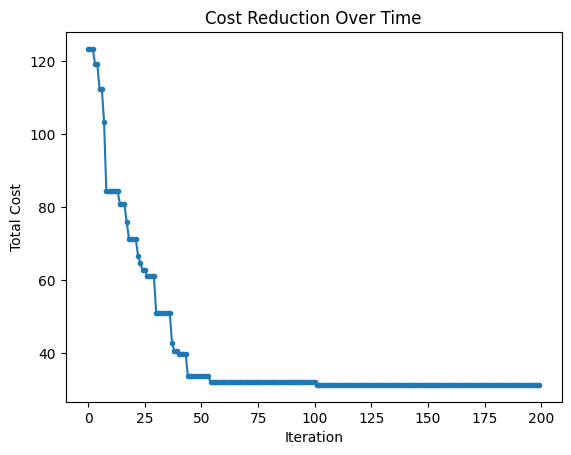

In [10]:
# Plot the cost improvement over iterations
plt.plot(evaluations, '.-')
plt.xlabel('Iteration')
plt.ylabel('Total Cost')
plt.title('Cost Reduction Over Time')
plt.show()

---
# **APPLICATION-2**






# **Enumerate All Feature Subsets :**
### It refers to the process of generating every possible subset of a given set of features. In feature selection, this approach examines all combinations of features to identify the subset that yields the best model performance.

## **EXPLANATION:**


1.   **Feature Set:** Suppose we have a set of
𝑛
nfeatures
{
𝑓
1
,
𝑓
2
,
…
,
𝑓
𝑛
}
.
2.   **Possible Subsets:** There are
2
𝑛
  possible subsets of these features (including the empty subset and the subset with all features). Each subset represents a unique combination of features that could be used to train a model.
  
  For example, if we have a set of 3 features

  *   {} (empty set, no features)
  *  {f
1
​
 },
{
𝑓
2
},
{
𝑓
3
} (single-feature subsets)
  *   {f
1
​
 ,f
2
​
 },
{
𝑓
1
,
𝑓
3
},
{
𝑓
2
,
𝑓
3
} (two-feature subsets)
  * {f
1
​
 ,f
2
​
 ,f
3
​
 } (all features)



3.  **Evaluating Each Subset:** For each subset, we:
  *   Train a model using only the features in that subset.
  *   Evaluate the model’s performance (e.g., accuracy, F1-score).



4.   **Selecting the Best Subset:** After evaluating all subsets, we select the subset with the best performance according to the chosen metric

## **Mathematical Formulation:**


1.   **Total Number of Subsets:** Given
𝑛
features, there are
2
𝑛
  possible subsets. This is because each feature can either be included or excluded, leading to
2
choices for each of the
𝑛
features.


2.   Computational **Complexity:** For large
𝑛
,
2
𝑛
  grows exponentially, making it impractical to enumerate all subsets when
𝑛
 is large. For example:
  *   If
𝑛
=
3, there are
2
^
3
=
8
subsets.
  *   If
𝑛
=
10, there are
2
^
10
=
1024
subsets.
  *  If
𝑛
=
20, there are
2
^
20
≈
1
million subsets.

 Because of this exponential growth, exhaustive enumeration is often computationally infeasible for large feature sets."Enumerate All Feature Subsets" refers to the process of generating every possible subset of a given set of features. In feature selection, this approach examines all combinations of features to identify the subset that yields the best model performance.

### Explanation in Terms of Feature Selection

1. **Feature Set**:
   Suppose we have a set of \( n \) features \( \{f_1, f_2, \ldots, f_n\} \).
   
2. **Possible Subsets**:
   There are \( 2^n \) possible subsets of these features (including the empty subset and the subset with all features). Each subset represents a unique combination of features that could be used to train a model.

   For example, if we have a set of 3 features \( \{f_1, f_2, f_3\} \), the possible subsets are:
   - \( \{\} \) (empty set, no features)
   - \( \{f_1\} \), \( \{f_2\} \), \( \{f_3\} \) (single-feature subsets)
   - \( \{f_1, f_2\} \), \( \{f_1, f_3\} \), \( \{f_2, f_3\} \) (two-feature subsets)
   - \( \{f_1, f_2, f_3\} \) (all features)

3. **Evaluating Each Subset**:
   For each subset, we:
   - Train a model using only the features in that subset.
   - Evaluate the model’s performance (e.g., accuracy, F1-score).
   
4. **Selecting the Best Subset**:
   After evaluating all subsets, we select the subset with the best performance according to the chosen metric.

### Mathematical Formulation

1. **Total Number of Subsets**:
   Given \( n \) features, there are \( 2^n \) possible subsets. This is because each feature can either be included or excluded, leading to \( 2 \) choices for each of the \( n \) features.

2. **Computational Complexity**:
   For large \( n \), \( 2^n \) grows exponentially, making it impractical to enumerate all subsets when \( n \) is large. For example:
   - If \( n = 3 \), there are \( 2^3 = 8 \) subsets.
   - If \( n = 10 \), there are \( 2^{10} = 1024 \) subsets.
   - If \( n = 20 \), there are \( 2^{20} \approx 1\) million subsets.

Because of this exponential growth, exhaustive enumeration is often computationally infeasible for large feature sets. Instead, **stochastic or heuristic search algorithms** like genetic algorithms, hill climbing, or forward selection are commonly used to explore the feature space without evaluating every possible subset.







In [11]:
# define a small classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=5, n_informative=2, n_redundant=3, random_state=1)
# summarize the shape of the dataset
print(X.shape, y.shape)

(1000, 5) (1000,)


This code snippet demonstrates how to create a synthetic classification dataset using `make_classification` from the `sklearn.datasets` module. It sets up a small dataset to experiment with machine learning models.

### Code Explanation

1. **Importing `make_classification`**:
   - `from sklearn.datasets import make_classification`: This imports the `make_classification` function, which is commonly used for generating synthetic datasets for classification tasks.

2. **Defining the Dataset**:
   - `X, y = make_classification(...)`: This function creates a dataset with specified properties and returns two arrays:
     - `X`: The feature matrix (independent variables).
     - `y`: The target array (dependent variable).
   
   - **Parameters of `make_classification`**:
     - `n_samples=1000`: Specifies that the dataset should have 1000 samples (rows).
     - `n_features=5`: Specifies that each sample should have 5 features (columns).
     - `n_informative=2`: Sets 2 of the 5 features as "informative," meaning they are useful in determining the target variable.
     - `n_redundant=3`: Sets 3 of the 5 features as "redundant," meaning they are linear combinations of the informative features and thus add no additional predictive power.
     - `random_state=1`: Sets a random seed to ensure reproducibility, so each run generates the same data.

3. **Summarizing the Dataset Shape**:
   - `print(X.shape, y.shape)`: Prints the shape of the feature matrix `X` and the target vector `y` to provide a summary of the dataset's dimensions.
     - `X.shape` will output `(1000, 5)`, meaning 1000 samples with 5 features each.
     - `y.shape` will output `(1000,)`, meaning there are 1000 labels, one for each sample in `X`.


In [12]:
# evaluate a decision tree on the entire small dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=3, n_informative=2, n_redundant=1, random_state=1)
# define model
model = DecisionTreeClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.809 (0.029)


This code evaluates a `DecisionTreeClassifier` on a synthetic classification dataset using cross-validation.

### Explanation

1. **Dataset Creation**:
   - `X, y = make_classification(...)`: Generates a dataset with 1000 samples and 3 features, where:
     - `n_informative=2`: 2 features are informative (helpful in predicting the target).
     - `n_redundant=1`: 1 feature is redundant (linearly dependent on the informative features).

2. **Model Definition**:
   - `model = DecisionTreeClassifier()`: Defines a basic decision tree classifier as the model to evaluate.

3. **Cross-Validation Setup**:
   - `cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)`: Sets up repeated stratified k-fold cross-validation, which:
     - Splits the dataset into 10 folds (`n_splits=10`) for each run.
     - Repeats the cross-validation process 3 times (`n_repeats=3`), providing a more reliable accuracy estimate.
     - Ensures reproducibility with `random_state=1`.

4. **Model Evaluation**:
   - `scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)`: Evaluates the model using accuracy as the metric:
     - `n_jobs=-1`: Utilizes all available CPU cores for faster computation.
   - `mean(scores)` and `std(scores)`: Calculates the mean and standard deviation of the accuracy scores across all cross-validation folds and repeats.

5. **Reporting Results**:
   - `print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))`: Prints the average accuracy and its standard deviation, providing insight into model performance and stability.


In [13]:
# feature selection by enumerating all possible subsets of features
from itertools import product
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=5, n_informative=2, n_redundant=3, random_state=1)
# determine the number of columns
n_cols = X.shape[1]
best_subset, best_score = None, 0.0
# enumerate all combinations of input features
for subset in product([True, False], repeat=n_cols):
	# convert into column indexes
	ix = [i for i, x in enumerate(subset) if x]
	# check for now column (all False)
	if len(ix) == 0:
		continue
	# select columns
	X_new = X[:, ix]
	# define model
	model = DecisionTreeClassifier()
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X_new, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# summarize scores
	result = mean(scores)
	# report progress
	print('>f(%s) = %f ' % (ix, result))
	# check if it is better than the best so far
	if best_score is None or result >= best_score:
		# better result
		best_subset, best_score = ix, result
# report best
print('Done!')
print('f(%s) = %f' % (best_subset, best_score))

>f([0, 1, 2, 3, 4]) = 0.816333 
>f([0, 1, 2, 3]) = 0.824000 
>f([0, 1, 2, 4]) = 0.822667 
>f([0, 1, 2]) = 0.823667 
>f([0, 1, 3, 4]) = 0.822667 
>f([0, 1, 3]) = 0.825667 
>f([0, 1, 4]) = 0.809000 
>f([0, 1]) = 0.822000 
>f([0, 2, 3, 4]) = 0.828667 
>f([0, 2, 3]) = 0.822000 
>f([0, 2, 4]) = 0.828000 
>f([0, 2]) = 0.817333 
>f([0, 3, 4]) = 0.829000 
>f([0, 3]) = 0.819667 
>f([0, 4]) = 0.819667 
>f([0]) = 0.639333 
>f([1, 2, 3, 4]) = 0.825000 
>f([1, 2, 3]) = 0.822333 
>f([1, 2, 4]) = 0.829000 
>f([1, 2]) = 0.818667 
>f([1, 3, 4]) = 0.820333 
>f([1, 3]) = 0.823333 
>f([1, 4]) = 0.804333 
>f([1]) = 0.797000 
>f([2, 3, 4]) = 0.828333 
>f([2, 3]) = 0.759000 
>f([2, 4]) = 0.826667 
>f([2]) = 0.516667 
>f([3, 4]) = 0.826333 
>f([3]) = 0.514333 
>f([4]) = 0.777667 
Done!
f([1, 2, 4]) = 0.829000



### Explanation

1. **Imports and Dataset Creation**:
   - `from itertools import product`: Imports `product` to generate all possible combinations of True/False for feature selection.
   - `from numpy import mean`: Imports `mean` to calculate average accuracy.
   - `X, y = make_classification(...)`: Creates a synthetic classification dataset with 1000 samples and 5 features:
     - `n_informative=2`: 2 features contribute to predicting the target.
     - `n_redundant=3`: 3 features are redundant (linearly dependent on informative features).

2. **Setting Up Enumeration**:
   - `n_cols = X.shape[1]`: Gets the total number of features (5 in this case).
   - `best_subset, best_score = None, 0.0`: Initializes variables to keep track of the best feature subset and its score.

3. **Enumerating All Feature Subsets**:
   - `for subset in product([True, False], repeat=n_cols)`: Generates all combinations of including/excluding each feature (2^5 = 32 combinations for 5 features).

4. **Selecting Columns**:
   - `ix = [i for i, x in enumerate(subset) if x]`: For each subset, this list comprehension selects feature indices where `x` is `True` (i.e., selected features).
   - `if len(ix) == 0: continue`: Skips subsets with no features selected (all False).

5. **Model Definition and Evaluation**:
   - `X_new = X[:, ix]`: Selects only the columns in `ix` to create a feature subset.
   - `model = DecisionTreeClassifier()`: Defines a decision tree classifier model.
   - `cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)`: Sets up cross-validation with 10 folds, repeated 3 times.
   - `scores = cross_val_score(model, X_new, y, scoring='accuracy', cv=cv, n_jobs=-1)`: Evaluates the model with the subset of features using cross-validation, where `n_jobs=-1` enables parallel processing.
   - `result = mean(scores)`: Calculates the average accuracy for this subset.

6. **Tracking the Best Subset**:
   - `if best_score is None or result >= best_score`: Checks if the current subset's score is the best so far.
   - `best_subset, best_score = ix, result`: Updates the best subset and score if the current subset performs better.

7. **Final Output**:
   - Prints each subset's performance during the loop.
   - After the loop, reports the best subset and its accuracy score.



# **FORMULAS USED:**

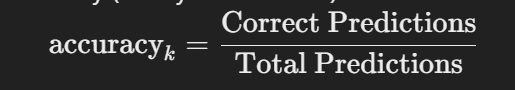


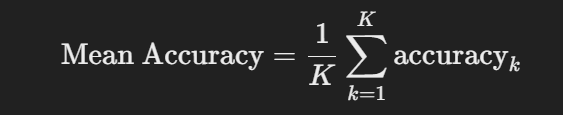

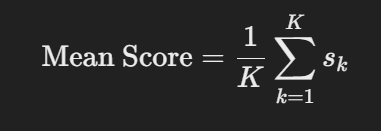

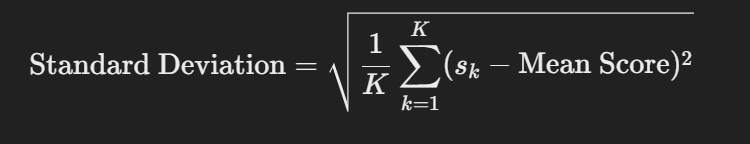

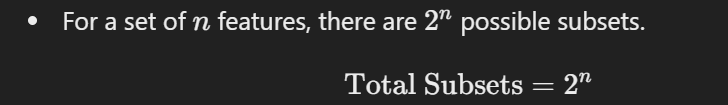

---
# **OPTIMIZE FEATURE SUBSETS**
Optimizing subset features, often referred to as *feature selection*, is the process of selecting a subset of relevant features (or variables) in a dataset to improve the performance and efficiency of a machine learning model. This technique is particularly helpful in reducing overfitting, improving model interpretability, and reducing computation time, especially with large datasets containing numerous features.


In [14]:
# define a large classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=10000, n_features=500, n_informative=10, n_redundant=490, random_state=1)
# summarize the shape of the dataset
print(X.shape, y.shape)

(10000, 500) (10000,)


# EXPLANATION:
This code snippet generates a synthetic classification dataset with many features, most of which are redundant, using scikit-learn's `make_classification` function. Here’s a breakdown:

   - `n_samples=10000`: Specifies the number of samples (rows) in the dataset. Here, 10,000 samples are generated.
   - `n_features=500`: Specifies the total number of features (columns) in the dataset. Here, 500 features are created.
   - `n_informative=10`: Specifies the number of informative features that are actually useful for predicting the target variable `y`. Here, only 10 features carry meaningful information.
   - `n_redundant=490`: Specifies the number of redundant features, which are linear combinations of the informative features and add no new information to the model. Here, 490 features are redundant.
   - `random_state=1`: Sets the random seed for reproducibility, ensuring the same dataset is generated each time the code is run.

   - `X` is the feature matrix with shape `(10000, 500)`, where each row represents a sample and each column represents a feature.
   - `y` is the target vector (the labels) with shape `(10000,)`, where each element corresponds to the label of a sample in `X`.

   - `X.shape` returns the shape of the feature matrix, which should output `(10000, 500)`, indicating 10,000 samples with 500 features.
   - `y.shape` returns the shape of the target vector, which should output `(10000,)`, indicating 10,000 labels.


In [15]:
# evaluate a decision tree on the entire larger dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
# define dataset
X, y = make_classification(n_samples=10000, n_features=500, n_informative=10, n_redundant=490, random_state=1)
# define model
model = DecisionTreeClassifier()
# define evaluation procedure
cv = StratifiedKFold(n_splits=3)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.914 (0.002)


# EXPLANATION:
This code evaluates the performance of a Decision Tree Classifier on a large, synthetic classification dataset using k-fold cross-validation.

1. **Import Libraries**:

   - `mean` and `std` from numpy: Used to compute the mean and standard deviation of the cross-validation scores.
   - `make_classification`: Generates a synthetic classification dataset.
   - `cross_val_score`: Evaluates the model using cross-validation.
   - `StratifiedKFold`: A variation of k-fold cross-validation that maintains the proportion of classes in each fold.
   - `DecisionTreeClassifier`: Implements the Decision Tree algorithm for classification.

2. **Generate the Dataset**:
   - `X, y = make_classification(n_samples=10000, n_features=500, n_informative=10, n_redundant=490, random_state=1)`:
   - Generates a dataset with 10,000 samples, 500 features, 10 informative features, and 490 redundant features (as explained in the previous example).

3. **Define the Model**:
   - `model = DecisionTreeClassifier()`:

   - Initializes a basic Decision Tree classifier model with default parameters. Decision Trees are popular in classification tasks as they model the decision-making process using a tree-like structure.

4. **Define the Evaluation Procedure**:
  
   - `StratifiedKFold` is used to split the data into 3 stratified folds, where each fold contains approximately the same proportion of each class as the full dataset. This helps ensure balanced class distributions in each fold, improving the reliability of cross-validation results.

5. **Evaluate the Model**:

  
   - `cross_val_score` evaluates the `model` using 3-fold cross-validation (specified by `cv=cv`).
   - `scoring='accuracy'`: Measures the accuracy of the model on each fold.
   - `n_jobs=-1`: Runs the cross-validation in parallel, using all available CPU cores to speed up the process.
   - The function returns an array of accuracy scores for each fold.

6. **Report the Results**:
  
   - `mean(scores)`: Calculates the mean accuracy score across all folds.
   - `std(scores)`: Calculates the standard deviation of accuracy scores across folds, providing insight into the variability of model performance.
   - The results are printed, with accuracy scores formatted to three decimal places.



In [ ]:
# stochastic optimization for feature selection
from numpy import mean
from numpy.random import rand
from numpy.random import choice
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# objective function
def objective(X, y, subset):
	# convert into column indexes
	ix = [i for i, x in enumerate(subset) if x]
	# check for now column (all False)
	if len(ix) == 0:
		return 0.0
	# select columns
	X_new = X[:, ix]
	# define model
	model = DecisionTreeClassifier()
	# evaluate model
	scores = cross_val_score(model, X_new, y, scoring='accuracy', cv=3, n_jobs=-1)
	# summarize scores
	result = mean(scores)
	return result, ix

# mutation operator
def mutate(solution, p_mutate):
	# make a copy
	child = solution.copy()
	for i in range(len(child)):
		# check for a mutation
		if rand() < p_mutate:
			# flip the inclusion
			child[i] = not child[i]
	return child

# hill climbing local search algorithm
def hillclimbing(X, y, objective, n_iter, p_mutate):
	# generate an initial point
	solution = choice([True, False], size=X.shape[1])
	# evaluate the initial point
	solution_eval, ix = objective(X, y, solution)
	# run the hill climb
	for i in range(n_iter):
		# take a step
		candidate = mutate(solution, p_mutate)
		# evaluate candidate point
		candidate_eval, ix = objective(X, y, candidate)
		# check if we should keep the new point
		if candidate_eval >= solution_eval:
			# store the new point
			solution, solution_eval = candidate, candidate_eval
		# report progress
		print('>%d f(%s) = %f' % (i+1, len(ix), solution_eval))
	return solution, solution_eval

# define dataset1111111111111
X, y = make_classification(n_samples=10000, n_features=500, n_informative=10, n_redundant=490, random_state=1)
# define the total iterations
n_iter = 100
# probability of including/excluding a column
p_mut = 10.0 / 500.0
# perform the hill climbing search
subset, score = hillclimbing(X, y, objective, n_iter, p_mut)
# convert into column indexes
ix = [i for i, x in enumerate(subset) if x]
print('Done!')
print('Best: f(%d) = %f' % (len(ix), score))

# **EXPLANATION:**
This code demonstrates the use of *stochastic optimization* through a hill-climbing algorithm for feature selection in a machine learning context. The goal is to identify an optimal subset of features from a larger dataset that improves the accuracy of a classifier—in this case, a `DecisionTreeClassifier`. Here’s a step-by-step explanation:

### 1. Import Libraries

- `mean` from numpy: Computes the mean score across cross-validation folds.
- `rand` and `choice` from numpy: Generates random values, used for initializing solutions and mutating solutions during optimization.
- `make_classification`, `cross_val_score`, `DecisionTreeClassifier`: Imports used to create a synthetic dataset, perform cross-validation, and classify the data.

### 2. Define the Objective Function

- `objective(X, y, subset)`: Computes the accuracy of a `DecisionTreeClassifier` on a subset of features.
- `ix`: A list of column indices for features included in the subset.
- `if len(ix) == 0`: If no features are selected (all `False`), returns a score of 0.0.
- `X_new = X[:, ix]`: Selects only the features indicated by `ix`.
- `cross_val_score(model, X_new, y, scoring='accuracy', cv=3, n_jobs=-1)`: Evaluates the model’s accuracy using 3-fold cross-validation.
- `result = mean(scores)`: Averages the scores to get a single performance metric.
- Returns `result` (mean accuracy) and `ix` (indices of selected features).

### 3. Define the Mutation Operator

- `mutate(solution, p_mutate)`: Randomly flips bits in the feature selection array (`solution`) based on the mutation probability `p_mutate`.
- For each feature in `solution`, a random number is generated using `rand()`. If this number is less than `p_mutate`, the feature's inclusion status is flipped.

### 4. Define the Hill-Climbing Algorithm

- `hillclimbing(X, y, objective, n_iter, p_mutate)`: Attempts to improve a solution iteratively by accepting mutations that do not decrease performance.
- `solution = choice([True, False], size=X.shape[1])`: Initializes a random feature selection array.
- `solution_eval, ix = objective(X, y, solution)`: Evaluates the initial solution.
- For each iteration (`n_iter`):
  - `candidate = mutate(solution, p_mutate)`: Generates a mutated solution.
  - `candidate_eval, ix = objective(X, y, candidate)`: Evaluates the candidate.
  - If `candidate_eval` is better than or equal to `solution_eval`, the candidate becomes the new solution.
  - Reports the iteration number, number of selected features, and the current best accuracy.

### 5. Run the Hill-Climbing Search

- `make_classification(...)`: Creates the synthetic dataset.
- `n_iter = 100`: Specifies the number of hill-climbing iterations.
- `p_mut = 10.0 / 500.0`: Mutation probability, ensuring each feature has a 2% chance of being flipped.
- `subset, score = hillclimbing(...)`: Runs hill climbing to find the best subset of features.
- `ix`: Lists the indices of the best subset of features.
- `print(...)`: Displays the final subset size and best accuracy score.


# **FORMULAS USED:**

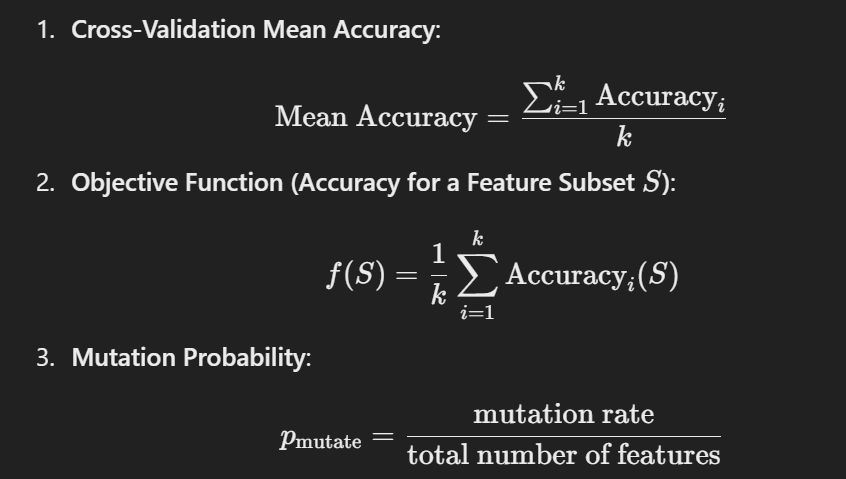

These formulas govern the accuracy calculations, feature subset evaluations, mutation operations, and the overall logic for feature selection using hill climbing.


---

